In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%pwd

'/content'

In [ ]:
%cd

/root


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
links= pd.read_csv('/content/links.csv')

In [ ]:
movies= pd.read_csv('/content/movies.csv')

In [ ]:
ratings= pd.read_csv('/content/ratings.csv')

In [ ]:
tags= pd.read_csv('/content/tags.csv')

In [ ]:
print(movies.head())
print(movies.shape)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
(9742, 3)


In [ ]:
print(links.head())
print(links.shape)

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
(9742, 3)


In [ ]:
print(ratings.head())
print(ratings.shape)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)


In [ ]:
ratings[ratings['movieId']==80489].head()

,userId,movieId,rating,timestamp
247,2,80489,4.5,1445715340
2168,18,80489,4.0,1463686312
4835,29,80489,4.0,1362016591
12668,80,80489,4.5,1377307920
17666,111,80489,3.0,1516140726


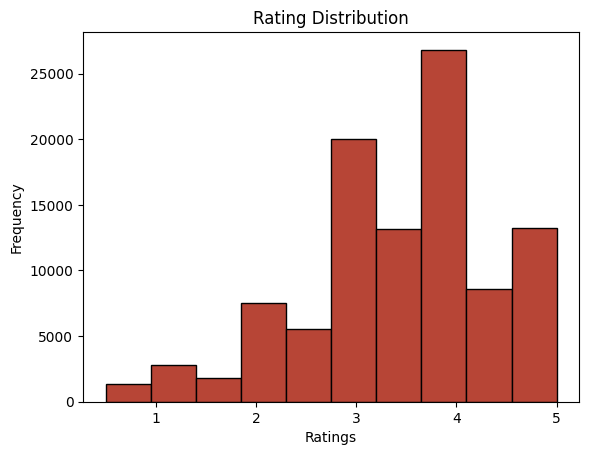

In [ ]:
plt.hist(ratings['rating'], bins=10, edgecolor='black', color= '#b74536' )
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

plt.show()

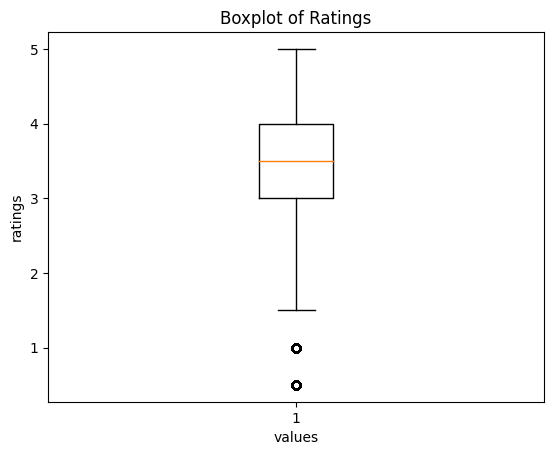

In [ ]:
plt.boxplot(ratings['rating'])
plt.xlabel('values')
plt.ylabel('ratings')
plt.title('Boxplot of Ratings')

plt.show()

In [ ]:
print(tags.head())
print(tags.shape)

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
(3683, 4)


*Let's drop the timestamp column from the tags.csv and the ratings.csv, since it doesn't add any useful information to our analysis*



In [ ]:
ratings.drop(columns='timestamp', inplace= True)

In [ ]:
tags.drop(columns= 'timestamp', inplace= True)

*The links.csv dataset is not useful for our analysis so we are not going to use it*

We are going to extract the year in which the movie was release from each title of the Movies dataset

In [ ]:
movies['Year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)

In [ ]:
movies.head()

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
movies

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [ ]:
import re

In [ ]:
movies['title'] = movies['title'].apply(lambda x: re.sub(r"[\(\[].*?[\)\]]", "", str(x)) if isinstance(x, str) else x)

In [ ]:
movies.head()

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [ ]:
movies[movies.duplicated()]

,movieId,title,genres,Year


Let's extract the genres and create a column per genre

In [ ]:
genres=[]
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        if x not in genres:
            genres.append(x)

len(genres)
for x in genres:
    movies[x] = 0
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        movies[x][i]=1

<ipython-input-27-6e691dbe6977>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[x][i]=1


In [ ]:
movies.drop(columns='genres', inplace=True)

In [ ]:
movies.sample(10)

,movieId,title,Year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
5060,7932,Dark Days,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4644,6942,Love Actually,2003,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2681,3591,Mr. Mom,1983,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6495,53280,"Breed, The",2006,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2166,2882,Jakob the Liar,1999,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4086,5839,My Father's Glory,1990,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4996,7713,Cat People,1942,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
7589,86332,Thor,2011,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
380,436,Color of Night,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7766,91488,"Snowman, The",1982,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
x= {}
for i in movies.columns[4:23]:
    x[i] =  movies[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i, x[i]))

Animation    				611
Children    				664
Comedy    				3756
Fantasy    				779
Romance    				1596
Drama    				4361
Action    				1828
Crime    				1199
Thriller    				1894
Horror    				978
Mystery    				573
Sci-Fi    				980
War    				382
Musical    				334
Documentary    				440
IMAX    				158
Western    				167
Film-Noir    				87
(no genres listed)    				34


In [ ]:
sorted_x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse= True)}

In [ ]:
sorted_x

{'Drama': 4361,
 'Comedy': 3756,
 'Thriller': 1894,
 'Action': 1828,
 'Romance': 1596,
 'Crime': 1199,
 'Sci-Fi': 980,
 'Horror': 978,
 'Fantasy': 779,
 'Children': 664,
 'Animation': 611,
 'Mystery': 573,
 'Documentary': 440,
 'War': 382,
 'Musical': 334,
 'Western': 167,
 'IMAX': 158,
 'Film-Noir': 87,
 '(no genres listed)': 34}

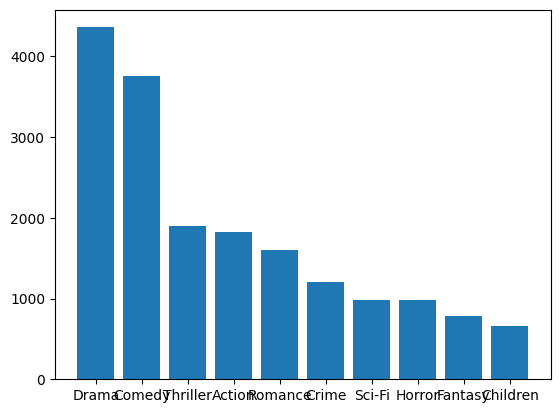

In [ ]:
plt.bar(height=list(sorted_x.values())[:10], x=list(sorted_x.keys())[:10])
plt.show()

In [ ]:
rat= ratings.groupby('movieId')['rating'].mean()

In [ ]:
movies= movies.merge(rat, how= 'left', on='movieId')

In [ ]:
user_count= ratings.groupby('movieId',as_index= False)['userId'].count()

In [ ]:
user_count

,movieId,userId
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [ ]:
movies= movies.merge(user_count, how= 'left', on='movieId')

In [ ]:
movies.columns

Index(['movieId', 'title', 'Year', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)', 'rating', 'userId'],
      dtype='object')

In [ ]:
movies= movies[['movieId', 'title', 'Year', 'rating','userId','Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)']]

In [ ]:
movies[movies['title']== 'Forrest Gump ']

,movieId,title,Year,rating,userId,Adventure,Animation,Children,Comedy,Fantasy,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
314,356,Forrest Gump,1994,4.164134,329.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
movies['rating'].fillna('0',inplace=True)

<ipython-input-42-01f2d08d07a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rating'].fillna('0',inplace=True)


In [ ]:
essential= movies[['movieId', 'title', 'Year', 'rating','userId']]

In [ ]:
essential.userId.fillna(0, inplace=True)

<ipython-input-44-cd3d6bc1f8ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential.userId.fillna(0, inplace=True)


In [ ]:
essential.userId= essential.userId.astype(int)

<ipython-input-45-f572436796e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential.userId= essential.userId.astype(int)


In [ ]:
essential['n_of_ratings']= essential['userId']

<ipython-input-46-0b271b727e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential['n_of_ratings']= essential['userId']


In [ ]:
essential.drop(columns='userId', inplace=True)

<ipython-input-47-39ae4c09f667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential.drop(columns='userId', inplace=True)


In [ ]:
essential.sort_values(by=['n_of_ratings'], ascending= False)

,movieId,title,Year,rating,n_of_ratings
314,356,Forrest Gump,1994,4.164134,329
277,318,"Shawshank Redemption, The",1994,4.429022,317
257,296,Pulp Fiction,1994,4.197068,307
510,593,"Silence of the Lambs, The",1991,4.16129,279
1939,2571,"Matrix, The",1999,4.192446,278
...,...,...,...,...,...
816,1076,"Innocents, The",1961,0,0
5957,34482,"Browning Version, The",1951,0,0
5421,25855,"Roaring Twenties, The",1939,0,0
7565,85565,Chalet Girl,2011,0,0


In [ ]:
essential.to_csv('/content/drive/MyDrive/Text Mining and Search/movie_rating.csv', index=False)

In [ ]:
tags.sample(20)

,userId,movieId,tag
1910,474,4359,adultery
2787,537,527,disturbing
2127,474,6368,movies
294,62,115149,Revenge
1351,474,1225,Mozart
2691,477,67087,bromance
1714,474,2968,time travel
3603,599,1732,drugs
645,356,61323,dark comedy
3076,567,7361,humane


Remove whitespaces

In [ ]:
text_column = tags['tag']

In [ ]:
text = ' '.join(text_column)

In [ ]:
total_length = len(text)
total_2_newlines = text.count('\n\n')
total_tabs = text.count('\t')
total_2_tabs = text.count('\t\t')
total_tab_and_newline = text.count('\n\t')

# Printing the total counts for the entire column
print('Total text length:', total_length)
print("Total number of 2 newlines:", total_2_newlines)
print("Total number of tabs:", total_tabs)
print("Total number of 2 tabs:", total_2_tabs)
print("Total number of tab and newline:", total_tab_and_newline)

Total text length: 41030
Total number of 2 newlines: 0
Total number of tabs: 0
Total number of 2 tabs: 0
Total number of tab and newline: 0


In [ ]:
text.count('\n')

0

Case Folding

In [ ]:
tags['tag'] = tags['tag'].str.lower()

In [ ]:
import string

In [ ]:
print("Library's punctuation: ", string.punctuation)
string.punctuation + '€'
### Customizing
custom = list(string.punctuation)

Library's punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
custom.append('€')

In [ ]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def custom_re(text, custom):
    punctuationfree = "".join([i for i in text if i not in custom])
    return punctuationfree

In [ ]:
tags['tag'] = tags['tag'].apply(custom_re, custom=custom)

In [ ]:
tags['tag'] = tags['tag'].apply(remove_punctuation)

In [ ]:
tags['tag'].sample(20)

1547               bible
1050              france
3331                 bad
2186    in netflix queue
2761         video games
1300            military
316                 thor
1973                race
1654             prequel
1853          drug abuse
2732          ridiculous
988             politics
1854    in netflix queue
1310               crime
2358    in netflix queue
682               ending
2062               class
535            cult film
1452               mafia
3642        great acting
Name: tag, dtype: object

In [ ]:
tags['tag'] = tags['tag'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
tags.iloc[1576]

userId      474
movieId    2145
tag           s
Name: 1576, dtype: object

In [ ]:
def character_repetition(text):
    # Pattern matching for all case alphabets
    # \1   It refers to the first capturing group.
    # {2,} It means we are matching for repetition that occurs more than two times (or equal).
    # r’\1\1' → It limits all the repetition to two characters.
    Pattern_alpha = re.compile(r"([A-Za-z])\1{2,}", re.DOTALL)
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    return Combined_Formatted

In [ ]:
tags['tag'] = tags['tag'].apply(character_repetition)

In [ ]:
def remove_links(text):
    if isinstance(text, str):  # Check if the input is a string
        # Removing all occurrences of links that start with https
        remove_https = re.sub(r'http\S+', ' ', text)
        # Remove all occurrences of text that end with .com
        remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
        return remove_com
    else:
        return text  # Return non-string input as is


In [ ]:
tags['tag'] = tags['tag'].apply(remove_links)

In [ ]:
!pip install emoji
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 716.0 kB/s eta 0:00:00


In [ ]:
import emoji
import demoji

In [ ]:
demoji.download_codes()

# Function to remove emojis from a string
def remove_emojis(text):
   return demoji.replace(text, '')

<ipython-input-74-7caaefac5535>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
tags['tag'] = tags['tag'].apply(remove_emojis)

In [ ]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [ ]:
tags['tag'] = tags['tag'].apply(strip_html_tags)

TOKENIZE

In [ ]:

from nltk.tokenize import WordPunctTokenizer

def tokenize_text(text):
    tokenizer = WordPunctTokenizer()
    return tokenizer.tokenize(text)

tags['tag_tokens'] = tags['tag'].apply(tokenize_text)


In [ ]:
tags.sample(30)

,userId,movieId,tag,tag_tokens
859,424,4226,psychological,[psychological]
707,424,147,mark wahlberg,"[mark, wahlberg]"
373,62,158966,good writing,"[good, writing]"
1847,474,3897,music,[music]
3596,599,1732,coen brothers,"[coen, brothers]"
2080,474,6181,civil war,"[civil, war]"
1918,474,4465,rape,[rape]
1196,474,907,divorce,[divorce]
1783,474,3386,politics,[politics]
13,18,1221,al pacino,"[al, pacino]"


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(text):
  tokenized_text = WordPunctTokenizer().tokenize(text)

  tokenized_text_without_stopwords = []
  for token in tokenized_text:
    if token.lower() not in stop_words:
      tokenized_text_without_stopwords.append(token)
  return tokenized_text_without_stopwords

In [ ]:
tags['tag_nsw'] = tags['tag'].apply(remove_stopwords)

In [ ]:
tags.sample(30)

,userId,movieId,tag,tag_tokens,tag_nsw
646,357,39,chick flick,"[chick, flick]","[chick, flick]"
2689,477,66934,parody,[parody],[parody]
2681,477,61323,weird,[weird],[weird]
2478,474,39292,morrow,[morrow],[morrow]
2290,474,7619,deaf,[deaf],[deaf]
3441,599,296,fast paced,"[fast, paced]","[fast, paced]"
1759,474,3211,a dingo ate my baby,"[a, dingo, ate, my, baby]","[dingo, ate, baby]"
225,62,71535,emma stone,"[emma, stone]","[emma, stone]"
2469,474,38038,oscar nominated best movie animation,"[oscar, nominated, best, movie, animation]","[oscar, nominated, best, movie, animation]"
717,424,260,scifi,[scifi],[scifi]


Qui sopra nella colonna tags sono state rimosse le stop words---> vedi 2412

In [ ]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()


def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

In [ ]:
tags['tag_nsw'] = tags['tag_nsw'].apply(stemming)

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

In [ ]:
tags['tag_lemm'] = tags['tag_tokens'].apply(lemmatizer)

In [ ]:
tags.sample(15)

,userId,movieId,tag,tag_tokens,tag_nsw,tag_lemm
3025,567,5673,awkward,[awkward],[awkward],[awkward]
2270,474,7301,priest,[priest],[priest],[priest]
1314,474,1188,australia,[australia],[australia],[australia]
19,18,52604,courtroom drama,"[courtroom, drama]","[courtroom, drama]","[courtroom, drama]"
148,62,34150,jessica alba,"[jessica, alba]","[jessica, alba]","[jessica, alba]"
3172,567,95558,poetic,[poetic],[poetic],[poetic]
1778,474,3338,in netflix queue,"[in, netflix, queue]","[netflix, queue]","[in, netflix, queue]"
1559,474,2071,in netflix queue,"[in, netflix, queue]","[netflix, queue]","[in, netflix, queue]"
3362,599,293,guns,[guns],[gun],[gun]
1967,474,4993,tolkein,[tolkein],[tolkein],[tolkein]


speech tagging

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def pos_tagging(text):
    return TextBlob(text).tags

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tags['tag_pos_tags'] = tags['tag'].apply(pos_tagging)

In [ ]:
tags

,userId,movieId,tag,tag_tokens,tag_nsw,tag_lemm,tag_pos_tags
0,2,60756,funny,[funny],[funni],[funny],"[(funny, NN)]"
1,2,60756,highly quotable,"[highly, quotable]","[highli, quotabl]","[highly, quotable]","[(highly, RB), (quotable, JJ)]"
2,2,60756,will ferrell,"[will, ferrell]",[ferrel],"[will, ferrell]","[(will, MD), (ferrell, VB)]"
3,2,89774,boxing story,"[boxing, story]","[box, stori]","[boxing, story]","[(boxing, VBG), (story, NN)]"
4,2,89774,mma,[mma],[mma],[mma],"[(mma, NN)]"
...,...,...,...,...,...,...,...
3678,606,7382,for katie,"[for, katie]",[kati],"[for, katie]","[(for, IN), (katie, NN)]"
3679,606,7936,austere,[austere],[auster],[austere],"[(austere, RB)]"
3680,610,3265,gun fu,"[gun, fu]","[gun, fu]","[gun, fu]","[(gun, NN), (fu, NN)]"
3681,610,3265,heroic bloodshed,"[heroic, bloodshed]","[heroic, bloodsh]","[heroic, bloodshed]","[(heroic, NN), (bloodshed, VBD)]"


In [ ]:
tags.to_csv('/content/tags_output2.csv', index=False)